In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

In [2]:
if not firebase_admin._apps:
    cred = credentials.Certificate("mergedefense-260f0-firebase-adminsdk-fbsvc-e5fa01948a.json")
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://mergedefense-260f0-default-rtdb.firebaseio.com/'
    })

In [3]:
ref = db.reference('/BetaPlayTestData1')
data = ref.get()
print("Data count:", len(data))
print(list(data.values())[:3])

Data count: 66
[{'ChangeColorCount': 8.0, 'DamageFromBurningTower': 124245.0, 'DamageFromCanonTower': 86400.0, 'DamageFromEnergyTower': 86206.09, 'DamageFromFrozenTower': 17320.0, 'MergeCount': 24.0, 'PlayerTime': 373.663147, 'Score': 295117.0, 'TowersOnTileList': [{'burningTowerNum': 1, 'canonTowerNum': 2, 'energyTowerNum': 3, 'goldTowerNum': 3, 'slowTowerNum': 1}, {'burningTowerNum': 3, 'canonTowerNum': 3, 'energyTowerNum': 3, 'goldTowerNum': 4, 'slowTowerNum': 3}, {'burningTowerNum': 4, 'canonTowerNum': 4, 'energyTowerNum': 2, 'goldTowerNum': 4, 'slowTowerNum': 3}, {'burningTowerNum': 3, 'canonTowerNum': 5, 'energyTowerNum': 4, 'goldTowerNum': 4, 'slowTowerNum': 3}, {'burningTowerNum': 5, 'canonTowerNum': 5, 'energyTowerNum': 6, 'goldTowerNum': 4, 'slowTowerNum': 4}, {'burningTowerNum': 7, 'canonTowerNum': 5, 'energyTowerNum': 6, 'goldTowerNum': 3, 'slowTowerNum': 4}]}, {'ChangeColorCount': 8.0, 'DamageFromBurningTower': 73975.0, 'DamageFromCanonTower': 42080.0, 'DamageFromEnergyTow

In [4]:
# with open("mergedefense-260f0-default-rtdb-export (4).json", "r", encoding="utf-8") as file:
#     data = json.load(file)

# # data = data["AlphaPlayTestData"]
# data = data["BetaPlayTestData"]
# data

In [5]:
damageFromBurningTower = 0
damageFromTankTower = 0
damageFromSlowTower = 0
damageFromEnergyTower = 0
playerTimeList = []
scoreList = []
mergeCountList = []
changeColorCountList = []
goldTowerCountList = []
for key, value in data.items():
#     if value["Score"] != 0 and value["MergeCount"] != 0 and 45 < float(value["PlayerTime"]) < 480:
    if value["Score"] != 0 and 60 < float(value["PlayerTime"]):
        damageFromBurningTower += value["DamageFromBurningTower"]
        damageFromTankTower += value["DamageFromCanonTower"]
        damageFromSlowTower += value["DamageFromFrozenTower"]
        damageFromEnergyTower += value["DamageFromEnergyTower"]
        playerTimeList.append(float(value["PlayerTime"]))
        mergeCountList.append(value["MergeCount"])
        changeColorCountList.append(value["ChangeColorCount"])
        scoreList.append(value["Score"])
print("Data count after clean:", len(data))

Data count after clean: 66


damageFromBurningTower: 2861905.0 damageFromCanonTower: 2133680.0 damageFromEnergyTower 1874878.7731 damageFromFrozenTower 695200.0


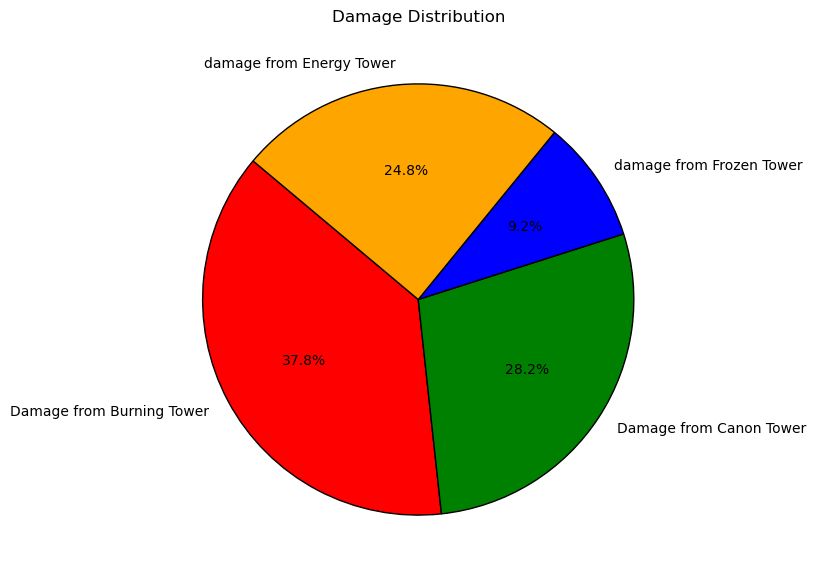

In [6]:
print(
    "damageFromBurningTower:", damageFromBurningTower, 
    "damageFromCanonTower:", damageFromTankTower, 
    "damageFromEnergyTower", damageFromEnergyTower,
    "damageFromFrozenTower", damageFromSlowTower
)
labels = ["Damage from Burning Tower", "Damage from Canon Tower", "damage from Frozen Tower", "damage from Energy Tower"]
values = [damageFromBurningTower, damageFromTankTower, damageFromSlowTower, damageFromEnergyTower]
colors = ["red", "green", "blue", "orange"]
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Damage Distribution")
plt.show()

Player Survival Time Analysis
count     41.000000
mean     295.685200
std       72.450289
min       64.034256
25%      274.971700
50%      311.385300
75%      334.314667
max      395.721222
dtype: float64


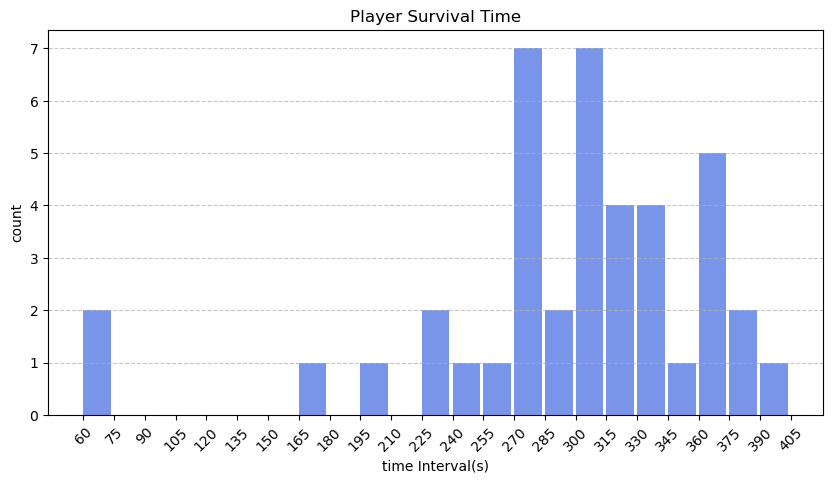

In [7]:
def playerTimeListVisual(data, bin_size = 30):
    print("Player Survival Time Analysis")
    df = pd.Series(data)
    print(df.describe())
    
    max_value = max(data)
    min_value = min(data)
    bins = np.arange(min_value - min_value%bin_size, max_value + bin_size, bin_size)

    hist, bin_edges = np.histogram(data, bins)

    plt.figure(figsize=(10, 5))
    plt.bar(bin_edges[:-1], hist, width=bin_size * 0.9, color="royalblue", alpha=0.7, align="edge")
    plt.xlabel("time Interval(s)")
    plt.ylabel("count")
    plt.title("Player Survival Time")
    plt.xticks(bins, rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
playerTimeListVisual(playerTimeList, 15)

Player Score Analysis
count        41.000000
mean     169283.975610
std       79763.456097
min         650.000000
25%      123717.000000
50%      177027.000000
75%      211337.000000
max      319147.000000
dtype: float64


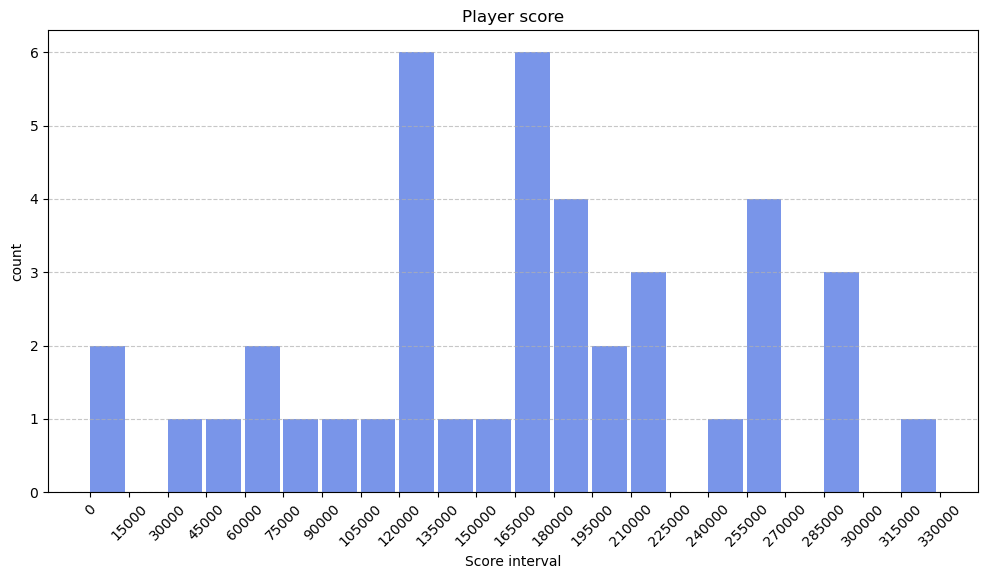

In [8]:
def scoreListVisual(data, bin_size = 20000):
    print("Player Score Analysis")
    df = pd.Series(data)
    print(df.describe())
    
    max_value = max(data)
    min_value = min(data)
    bins = np.arange(min_value - min_value%bin_size, max_value + bin_size, bin_size)

    hist, bin_edges = np.histogram(data, bins)
    plt.figure(figsize=(12, 6))
    plt.bar(bin_edges[:-1], hist, width=bin_size * 0.9, color="royalblue", alpha=0.7, align="edge")
    plt.xlabel("Score interval")
    plt.ylabel("count")
    plt.title("Player score")
    plt.xticks(bin_edges, rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
scoreListVisual(scoreList, 15000)

Player Merge Analysis
count    41.000000
mean     24.634146
std       7.949076
min       0.000000
25%      22.000000
50%      26.000000
75%      30.000000
max      37.000000
dtype: float64


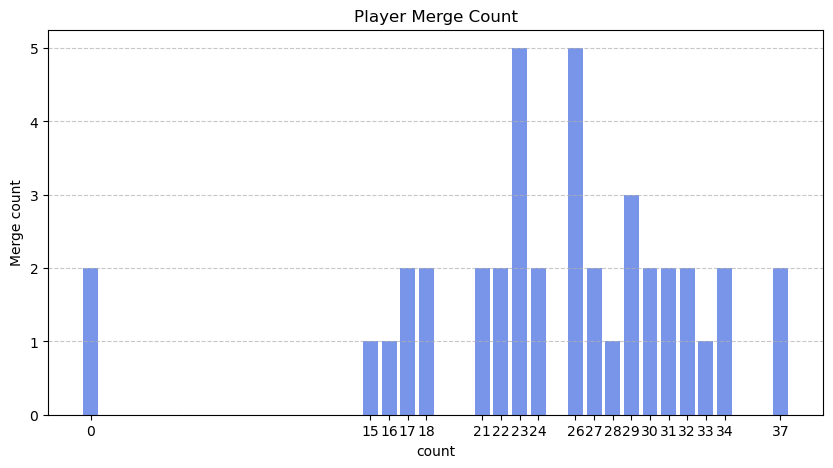

In [9]:
from collections import Counter
def playerActionVisual(data, action):
    print(f"Player {action} Analysis")
    df = pd.Series(data)
    print(df.describe())
    counter = Counter(data)  
    x_values = sorted(counter.keys())
    y_values = [counter[x] for x in x_values]

    plt.figure(figsize=(10, 5))
    plt.bar(x_values, y_values, color="royalblue", alpha=0.7)
    plt.xlabel("count")
    plt.ylabel(f"{action} count")
    plt.title(f"Player {action} Count")
    plt.xticks(x_values)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
playerActionVisual(mergeCountList, "Merge")

Player Change Color Analysis
count    41.000000
mean      6.390244
std       3.353193
min       0.000000
25%       4.000000
50%       7.000000
75%       9.000000
max      11.000000
dtype: float64


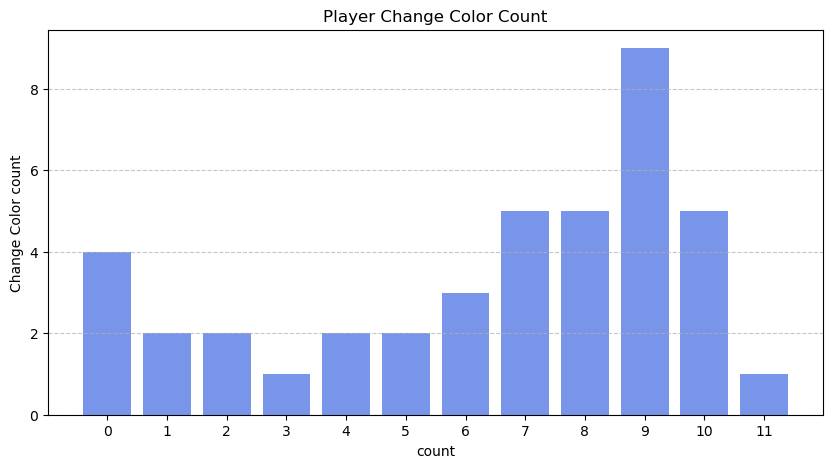

In [10]:
playerActionVisual(changeColorCountList, "Change Color")